In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
# import statsmodels.api as sm

In [51]:
def load_data(dir, file):
    file = file[:-4]
    demographic = pd.read_excel('gait-in-parkinsons-disease-1.0.0/demographics.xls')
    df = pd.read_csv(dir + '/' + file + '.txt', sep='\t', header=None)
    df.columns = ['time', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'R1' ,'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'totalL', 'totalR']
    id = file[:-3]
    df['Dataset'] = [file] * len(df)
    df['ID'] = [id]*len(df)
    df['group'] = [demographic[demographic['ID']==id]['Group'].values[0]]*len(df)
    return df

In [48]:
import glob, os
files = [] 
for file in os.listdir("gait-in-parkinsons-disease-1.0.0"):
    if file.endswith(".txt"):
        files.append(file)
files.remove('demographics.txt')
files.remove('format.txt')
files.remove('SHA256SUMS.txt')

df = pd.DataFrame()
for file in files:
    if files.index(file)+1%30==0: print('Loading {} of {}'.format(files.index(file)+1, len(files)))
    df = df.append(load_data('gait-in-parkinsons-disease-1.0.0', file))


KeyboardInterrupt: 

In [39]:
d1 = load_data('gait-in-parkinsons-disease-1.0.0', files[1])
d2 = load_data('gait-in-parkinsons-disease-1.0.0', files[2])
df = pd.DataFrame()
df = df.append(d1)
df = df.append(d2)
df.columns


Index(['time', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'R1', 'R2',
       'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'totalL', 'totalR', 'Dataset', 'ID',
       'group'],
      dtype='object')

In [9]:
file = 'GaCo01_01'
dir = 'gait-in-parkinsons-disease-1.0.0'
df = load_data(dir, file)

In [16]:
demographic = pd.read_excel('gait-in-parkinsons-disease-1.0.0/demographics.xls')
demographic

,ID,Study,Group,Subjnum,Gender,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
0,GaPt03,Ga,PD,3,female,82,1.45,50.0,3.0,20.0,10.0,36.34,NaN,0.778
1,GaPt04,Ga,PD,4,male,68,1.71,NaN,2.5,25.0,8.0,11.00,0.642,0.818
2,GaPt05,Ga,PD,5,female,82,1.53,51.0,2.5,24.0,5.0,14.50,0.908,0.614
3,GaPt06,Ga,PD,6,male,72,1.70,82.0,2.0,16.0,13.0,10.47,0.848,0.937
4,GaPt07,Ga,PD,7,female,53,1.67,54.0,3.0,44.0,22.0,18.34,0.677,0.579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,SiCo26,Si,CO,26,male,60,1.74,72.0,NaN,NaN,NaN,9.20,1.000,NaN
162,SiCo27,Si,CO,27,male,67,1.90,95.0,NaN,NaN,NaN,12.52,1.120,NaN
163,SiCo28,Si,CO,28,male,61,1.70,72.0,NaN,NaN,NaN,12.65,0.990,NaN
164,SiCo29,Si,CO,29,male,53,1.70,87.0,NaN,NaN,NaN,11.41,1.290,NaN


In [13]:
df

,time,L1,L2,L3,L4,L5,L6,L7,L8,R1,...,R4,R5,R6,R7,R8,totalL,totalR,Dataset,ID,group
0,0.0000,199.10,87.34,91.08,24.09,21.12,87.67,87.23,64.57,163.90,...,50.82,13.75,102.74,144.98,79.53,662.20,748.00,01,GaCo01,CO
1,0.0100,199.10,87.34,91.08,24.09,21.12,87.67,87.23,64.57,163.90,...,50.82,13.75,102.74,144.98,79.53,662.20,748.00,01,GaCo01,CO
2,0.0200,199.10,87.34,91.08,24.09,21.12,87.67,87.23,62.59,163.90,...,50.82,13.75,102.74,144.98,79.53,660.22,748.00,01,GaCo01,CO
3,0.0300,199.10,87.34,91.08,24.09,21.12,87.67,89.10,64.57,163.90,...,48.07,13.75,105.49,144.98,79.53,664.07,745.69,01,GaCo01,CO
4,0.0400,199.10,87.34,91.08,24.09,21.12,87.67,87.23,62.59,163.90,...,50.82,13.75,105.49,144.98,79.53,660.22,748.44,01,GaCo01,CO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12114,121.1315,305.91,85.14,58.08,0.00,0.00,0.00,0.00,0.00,15.73,...,33.88,33.00,255.42,432.19,147.29,449.13,933.90,01,GaCo01,CO
12115,121.1415,331.54,134.75,79.31,11.99,0.00,3.85,0.00,0.00,15.73,...,11.22,24.75,230.34,420.42,151.80,561.44,868.34,01,GaCo01,CO
12116,121.1515,352.44,181.94,102.96,39.60,0.00,17.49,2.97,0.00,13.97,...,5.61,19.25,192.39,402.82,154.00,697.40,802.12,01,GaCo01,CO
12117,121.1615,352.44,202.40,124.74,43.01,8.47,50.71,7.59,0.00,13.97,...,0.00,13.75,143.66,373.34,151.80,789.36,703.45,01,GaCo01,CO


<AxesSubplot:xlabel='time', ylabel='L1'>

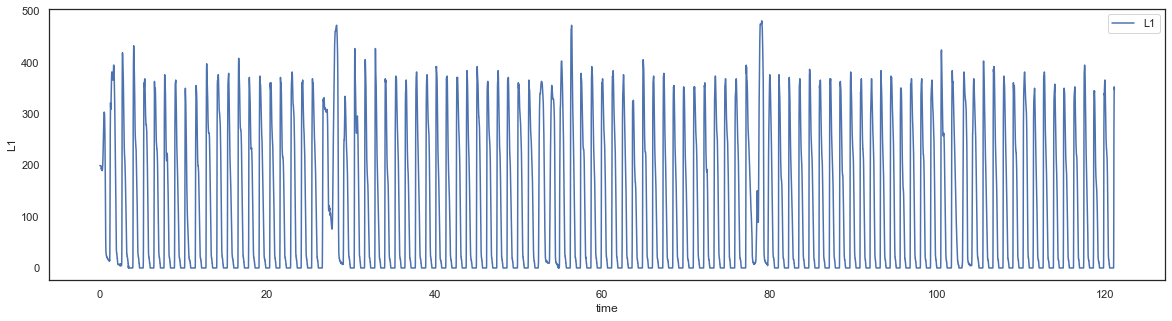

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
sns.set(style="white")
sns.lineplot(x='time', y='L1', data=df, label='L1')

## Autocorrelation

NameError: name 'plot_acf' is not defined

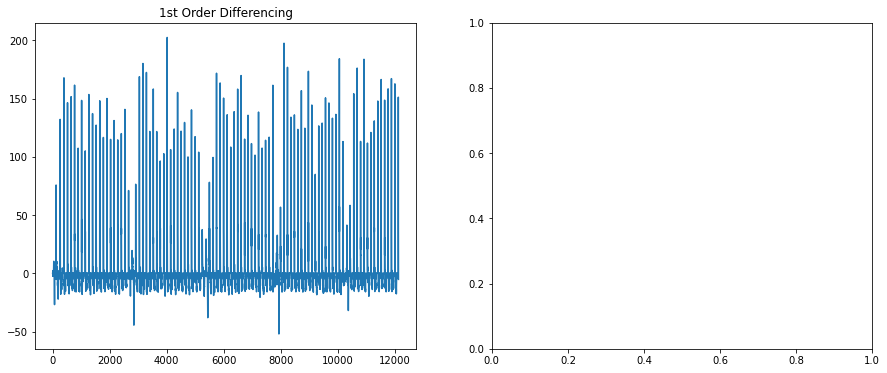

In [4]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
data = df['L1']
ax[0]. set_title('1st Order Differencing')
ax[0].plot(data.diff())
plot_acf(data.diff().dropna(), ax=ax[1])


## Forecasting 

In [10]:
# set up, fit, run, plot, and evaluate the RNN model
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


import torch.optim as optim
#from torch.utils.tensorboard import SummaryWriter

from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, Theta
from darts.metrics import mape, rmse, r2_score
from darts.utils.statistics import check_seasonality, plot_acf
from darts.utils.timeseries_generation import datetime_attribute_timeseries
import darts as ds 


import sys
import time
import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)


FC_N = 36               # forecast periods
FC_STRIDE = 10
FC_START = "19590101"   # period at which to split training and validation dataset
EPOCH = 300 

# setup the data
data = df['L1']
time = df['time']
df = pd.DataFrame([time, data])
ts = ds.timeseries.TimeSeries.from_dataframe(df)

is_seasonal, periodicity = check_seasonality(ts, max_lag=240)
dict_seas ={
    "is seasonal?":is_seasonal, 
    "periodicity (months)":f'{periodicity:.1f}', 
    "periodicity (~years)": f'{periodicity/12:.1f}'}
_ = [print(k,":",v) for k,v in dict_seas.items()]



ModuleNotFoundError: No module named 'darts'

In [ ]:

def run_RNN(flavor, ts, train, val):

    # set the model up
    model_RNN = RNNModel(
        model=flavor,
        model_name=flavor + str(" RNN"),
        input_chunk_length=periodicity,
        training_length=20,
        hidden_dim=20,
        batch_size=16,
        n_epochs=EPOCH,
        dropout=0,
        optimizer_kwargs={'lr': 1e-3},
        log_tensorboard=True,
        random_state=42,
        force_reset=True)
        
    if flavor == "RNN": flavor = "Vanilla" 

    # fit the model
    fit_it(model_RNN, train, val, flavor)

    # compute N predictions
    pred = model_RNN.predict(n=FC_N, future_covariates=covariates) 

    # plot predictions vs actual
    plot_fitted(pred, ts, flavor)

    # print accuracy metrics
    res_acc = accuracy_metrics(pred, ts)    
    print(flavor + " : ")
    _ = [print(k,":",f'{v:.4f}') for k,v in res_acc.items()]

    return [pred, res_acc]
# run 3 different flavors of RNN on the time series:
flavors = ["LSTM", "GRU", "RNN"]

# call the RNN model setup for each of the 3 RNN flavors
res_flavors = [run_RNN(flv, ts_trf, train_trf, val_trf) for flv in flavors]
view raw

In [85]:
totalTime = df['time'].max()
time = df['time']
nTrains = 8
trainTime = totalTime/nTrains

traindata = data[:int(len(data)*0.25)]
testdata = data[int(len(data)*0.25):]

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(traindata, order=(1,1,2))
model = model.fit()
print(model.summary())

predicted = model.predict(time[int(len(data)*0.25):])


# residuals = pd.DataFrame(model.resid)
# fig, ax = plt.subplots(1,2, figsize=(15,6))
# ax[0].set_title('Residuals')
# ax[0].plot(residuals)
# ax[1].set_title('kde plot')
# sns.histplot(residuals, ax=ax[1])

                               SARIMAX Results                                
Dep. Variable:                     L1   No. Observations:                 3029
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -11404.314
Date:                Sun, 08 May 2022   AIC                          22816.628
Time:                        17:31:21   BIC                          22840.691
Sample:                             0   HQIC                         22825.279
                               - 3029                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7820      0.020     38.943      0.000       0.743       0.821
ma.L1         -0.0880      0.021     -4.138      0.000      -0.130      -0.046
ma.L2         -0.0574      0.020     -2.885      0.0

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'